<a href="https://colab.research.google.com/github/SIRIGIREDDYDHANALAXMI/ML-project-1/blob/master/Housing_prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#step 1 importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [0]:
#STEP 2 DATA SET ASSIGN X_TRAIN , Y_TRAIN AND X_TEST
train =pd.read_csv("//content//drive//My Drive//house-prices-advanced-regression-techniques//train.csv" , na_values="NA")
test = pd.read_csv("//content//drive//My Drive//house-prices-advanced-regression-techniques//test.csv", na_values= "NA" )





Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


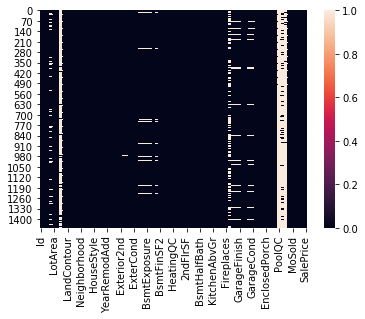

In [3]:
print(train.isnull().sum())
#step 3 remove NA values , replace na values > 50% with mean , categorical with mode and na <50% drop them....(SEE FROM HEATMAP) do it manually for trained and test data
print(sns.heatmap(train.isnull()))
print(train.dtypes)
  




AxesSubplot(0.125,0.125;0.62x0.755)


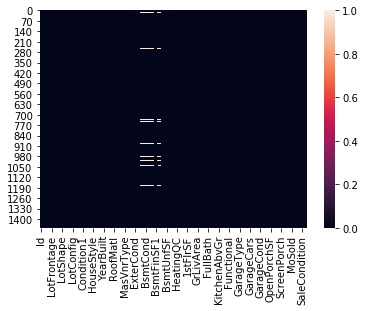

In [4]:
train['LotFrontage']= train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['FireplaceQu']= train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])
train['GarageType']= train['GarageType'].fillna(train['GarageType'].mode()[0])
train['GarageYrBlt']= train['GarageYrBlt'].fillna(train['GarageYrBlt'].mode()[0])
train['GarageFinish']= train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageQual']= train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageCond']= train['GarageCond'].fillna(train['GarageCond'].mode()[0])
train['MasVnrType']= train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['MasVnrArea']= train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0])

train.drop(columns=["Alley"],axis=1,inplace=True)
train.drop(columns=["MiscFeature"],axis=1,inplace=True)
train.drop(columns=["PoolQC"],axis=1,inplace=True)
train.drop(columns=["Fence"],axis=1,inplace=True)

print(sns.heatmap(train.isnull()))





AxesSubplot(0.125,0.125;0.62x0.755)


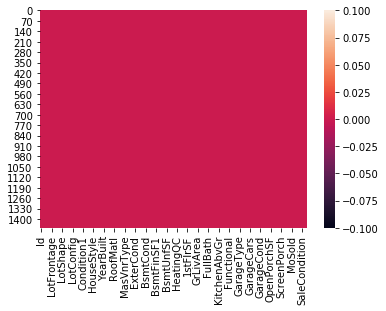

In [5]:

"""from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values="NA", strategy="most_frequent")
train=imputer.fit_transform(train)"""

train = train.fillna(train.mean)

print(sns.heatmap(train.isnull()))

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train["MSZoning"] = le.fit_transform(train["MSZoning"])
train["Street"] = le.fit_transform(train["Street"])


train["LotShape"] = le.fit_transform(train["LotShape"])
train["LandContour"] = le.fit_transform(train["LandContour"])
train["Utilities"] = le.fit_transform(train["Utilities"])
train["LotConfig"] = le.fit_transform(train["LotConfig"])
train["LandSlope"] = le.fit_transform(train["LandSlope"])
train["Neighborhood"] = le.fit_transform(train["Neighborhood"])
train["Condition1"] = le.fit_transform(train["Condition1"])
train["Condition2"] = le.fit_transform(train["Condition2"])
train["BldgType"] = le.fit_transform(train["BldgType"])
train["HouseStyle"] = le.fit_transform(train["HouseStyle"])
train["RoofStyle"] = le.fit_transform(train["RoofStyle"])
train["RoofMatl"] = le.fit_transform(train["RoofMatl"])
train["Exterior1st"] = le.fit_transform(train["Exterior1st"])
train["Exterior2nd"] = le.fit_transform(train["Exterior2nd"])
train["MasVnrType"] = le.fit_transform(train["MasVnrType"])
train["ExterQual"] = le.fit_transform(train["ExterQual"])
train["ExterCond"] = le.fit_transform(train["ExterCond"])
train["Foundation"] = le.fit_transform(train["Foundation"])
#train["BsmtQual"] = le.fit_transform(train["BsmtQual"])
#train["BsmtCond"] = le.fit_transform(train["BsmtCond"])
#train["BsmtExposure"] = le.fit_transform(train["BsmtExposure"])
#train["BsmtFinType1"] = le.fit_transform(train["BsmtFinType1"])
#train["BsmtFinType2"] = le.fit_transform(train["BsmtFinType2"])
train["Heating"] = le.fit_transform(train["Heating"])
train["HeatingQC"] = le.fit_transform(train["HeatingQC"])
train["CentralAir"] = le.fit_transform(train["CentralAir"])
#train["Electrical"] = le.fit_transform(train["Electrical"])"""
train["KitchenQual"] = le.fit_transform(train["KitchenQual"])
train["Functional"] = le.fit_transform(train["Functional"])
train["FireplaceQu"]=le.fit_transform(train["FireplaceQu"])
train["GarageType"] = le.fit_transform(train["GarageType"])
train["GarageFinish"] = le.fit_transform(train["GarageFinish"])
train["GarageQual"] = le.fit_transform(train["GarageQual"])
train["GarageCond"] = le.fit_transform(train["GarageCond"])
train["PavedDrive"] = le.fit_transform(train["PavedDrive"])
train["SaleType"] = le.fit_transform(train["SaleType"])
train["SaleCondition"] = le.fit_transform(train["SaleCondition"])

print(train["SaleType"].dtype)
train["BsmtQual"] = train["BsmtQual"].astype(str)
train["BsmtCond"] = train["BsmtCond"].astype(str)
train["BsmtExposure"] = train["BsmtExposure"].astype(str)
train["BsmtFinType1"] = train["BsmtFinType1"].astype(str)
train["BsmtFinType2"] = train["BsmtFinType2"].astype(str)
train["Electrical"] = train["Electrical"].astype(str)
train["BsmtQual"] = le.fit_transform(train["BsmtQual"])
train["BsmtCond"] = le.fit_transform(train["BsmtCond"])
train["BsmtExposure"] = le.fit_transform(train["BsmtExposure"])
train["BsmtFinType1"] = le.fit_transform(train["BsmtFinType1"])
train["BsmtFinType2"] = le.fit_transform(train["BsmtFinType2"])
train["Electrical"] = le.fit_transform(train["Electrical"])
train["LotFrontage"] = train["LotFrontage"].astype(int)



int64


Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


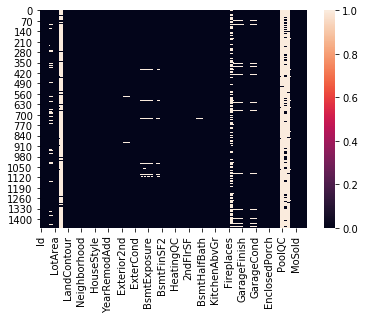

In [8]:
print(test.isnull().sum())
print(sns.heatmap(test.isnull()))

AxesSubplot(0.125,0.125;0.62x0.755)


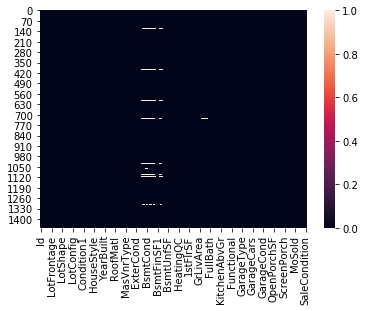

In [9]:
test['LotFrontage']= test['LotFrontage'].fillna(test['LotFrontage'].mean())
test['FireplaceQu']= test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])
test['GarageType']= test['GarageType'].fillna(test['GarageType'].mode()[0])
test['GarageYrBlt']= test['GarageYrBlt'].fillna(test['GarageYrBlt'].mode()[0])
test['GarageFinish']= test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageQual']= test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['GarageCond']= test['GarageCond'].fillna(test['GarageCond'].mode()[0])
test['MasVnrType']= test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['MasVnrArea']= test['MasVnrArea'].fillna(test['MasVnrArea'].mode()[0])

test.drop(columns=["Alley"],axis=1,inplace=True)
test.drop(columns=["MiscFeature"],axis=1,inplace=True)
test.drop(columns=["PoolQC"],axis=1,inplace=True)
test.drop(columns=["Fence"],axis=1,inplace=True)

print(sns.heatmap(test.isnull()))

AxesSubplot(0.125,0.125;0.62x0.755)


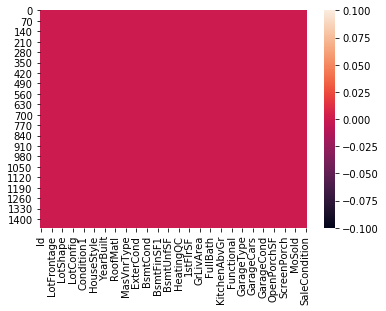

In [10]:

test = test.fillna(test.mean)

print(sns.heatmap(test.isnull()))


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


test["LotShape"] = test["LotShape"].astype(str)
test["LotShape"] = le.fit_transform(test["LotShape"])

test["LandContour"] = test["LandContour"].astype(str)
test["LandContour"] = le.fit_transform(test["LandContour"])

test["Utilities"] = test["Utilities"].astype(str)
test["Utilities"] = le.fit_transform(test["Utilities"])

test["LotConfig"] = test["LotConfig"].astype(str)
test["LotConfig"] = le.fit_transform(test["LotConfig"])

test["LandSlope"] = test["LandSlope"].astype(str)
test["LandSlope"] = le.fit_transform(test["LandSlope"])

test["Neighborhood"] = test["Neighborhood"].astype(str)
test["Neighborhood"] = le.fit_transform(test["Neighborhood"])

test["Condition1"] = test["Condition1"].astype(str)
test["Condition1"] = le.fit_transform(test["Condition1"])

test["Condition2"] = test["Condition2"].astype(str)
test["Condition2"] = le.fit_transform(test["Condition2"])

test["BldgType"] = test["BldgType"].astype(str)
test["BldgType"] = le.fit_transform(test["BldgType"])

test["HouseStyle"] = test["HouseStyle"].astype(str)
test["HouseStyle"] = le.fit_transform(test["HouseStyle"])

test["RoofStyle"] = test["RoofStyle"].astype(str)
test["RoofStyle"] = le.fit_transform(test["RoofStyle"])

test["RoofMatl"] = test["RoofMatl"].astype(str)
test["RoofMatl"] = le.fit_transform(test["RoofMatl"])

test["Exterior1st"] = test["Exterior1st"].astype(str)
test["Exterior1st"] = le.fit_transform(test["Exterior1st"])

test["Exterior2nd"] = test["Exterior2nd"].astype(str)
test["Exterior2nd"] = le.fit_transform(test["Exterior2nd"])

test["MasVnrType"] = test["MasVnrType"].astype(str)
test["MasVnrType"] = le.fit_transform(test["MasVnrType"])

test["ExterQual"] = test["ExterQual"].astype(str)
test["ExterQual"] = le.fit_transform(test["ExterQual"])

test["ExterCond"] = test["ExterCond"].astype(str)
test["ExterCond"] = le.fit_transform(test["ExterCond"])

test["Foundation"] = test["Foundation"].astype(str)
test["Foundation"] = le.fit_transform(test["Foundation"])

test["Heating"] = test["Heating"].astype(str)
test["Heating"] = le.fit_transform(test["Heating"])

test["HeatingQC"] = test["HeatingQC"].astype(str)
test["HeatingQC"] = le.fit_transform(test["HeatingQC"])

test["CentralAir"] = test["CentralAir"].astype(str)
test["CentralAir"] = le.fit_transform(test["CentralAir"])

test["KitchenQual"] = test["KitchenQual"].astype(str)
test["KitchenQual"] = le.fit_transform(test["KitchenQual"])

test["Functional"] = test["Functional"].astype(str)
test["Functional"] = le.fit_transform(test["Functional"])

test["FireplaceQu"] = test["FireplaceQu"].astype(str)
test["FireplaceQu"]=le.fit_transform(test["FireplaceQu"])

test["GarageType"] = test["GarageType"].astype(str)
test["GarageType"] = le.fit_transform(test["GarageType"])

test["GarageFinish"] = test["GarageFinish"].astype(str)
test["GarageFinish"] = le.fit_transform(test["GarageFinish"])

test["GarageQual"] = test["GarageQual"].astype(str)
test["GarageQual"] = le.fit_transform(test["GarageQual"])

test["GarageCond"] = test["GarageCond"].astype(str)
test["GarageCond"] = le.fit_transform(test["GarageCond"])

test["PavedDrive"] = test["PavedDrive"].astype(str)
test["PavedDrive"] = le.fit_transform(test["PavedDrive"])

test["SaleType"] = test["SaleType"].astype(str)
test["SaleType"] = le.fit_transform(test["SaleType"])

test["SaleCondition"] = test["SaleCondition"].astype(str)
test["SaleCondition"] = le.fit_transform(test["SaleCondition"])

test["MSZoning"] = test["MSZoning"].astype(str)
test["Street"] = test["Street"].astype(str)
test["BsmtQual"] = test["BsmtQual"].astype(str)
test["BsmtCond"] = test["BsmtCond"].astype(str)
test["BsmtExposure"] = test["BsmtExposure"].astype(str)
test["LotFrontage"] = test["LotFrontage"].astype(int)
test["BsmtFinType1"] = test["BsmtFinType1"].astype(str)
test["BsmtFinType2"] = test["BsmtFinType2"].astype(str)
test["Electrical"] = test["Electrical"].astype(str)
test["BsmtQual"] = le.fit_transform(test["BsmtQual"])
test["BsmtCond"] = le.fit_transform(test["BsmtCond"])
test["BsmtExposure"] = le.fit_transform(test["BsmtExposure"])
test["BsmtFinType1"] = le.fit_transform(test["BsmtFinType1"])
test["BsmtFinType2"] = le.fit_transform(test["BsmtFinType2"])
test["Electrical"] = le.fit_transform(test["Electrical"])
test["MSZoning"] = le.fit_transform(test["MSZoning"])
test["Street"] = le.fit_transform(test["Street"])

print(test.dtypes)


Id               int64
MSSubClass       int64
MSZoning         int64
LotFrontage      int64
LotArea          int64
                 ...  
MiscVal          int64
MoSold           int64
YrSold           int64
SaleType         int64
SaleCondition    int64
Length: 76, dtype: object


In [0]:
x_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1:]





x_test = test


In [19]:




from sklearn.ensemble import AdaBoostRegressor
lnreg = AdaBoostRegressor()
lnreg.fit(x_train , y_train)
y=lnreg.predict(x_test)
score= lnreg.score(x_test , y)
print(score)

y_yoyo = pd.read_csv("//content//drive//My Drive//house-prices-advanced-regression-techniques//sample_submission.csv")
y_actual = y_yoyo.iloc[:,-1:]




/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0


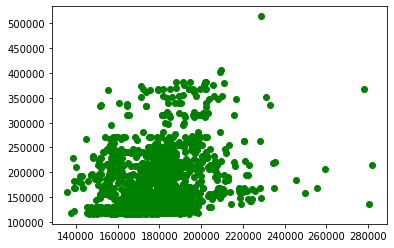

(1459,)
(1459, 1)


In [14]:
plt.scatter(y_actual , y, color="green")
plt.show()
print(y.shape)
print(y_actual.shape)


In [20]:

from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y, y_actual)

from math import sqrt
rmsle = np.sqrt(msle)
print(rmsle)


0.2967721929758035


In [21]:
#submission 

y_pred=pd.DataFrame(y)
dataset = pd.concat([ y_yoyo['Id'], y_pred] ,axis=1)
dataset.columns=['Id' ,"Saleprice"]
dataset.to_csv("//content//drive//My Drive//house-prices-advanced-regression-techniques//mysubmission.csv",index=False)

print(dataset.head())


     Id      Saleprice
0  1461  118945.278396
1  1462  130778.763158
2  1463  176841.594096
3  1464  180755.869458
4  1465  202106.556291
